In [2]:
import pandas as pd

## Exploring the time between bus pings for each route

In [16]:
def avg_time_between_pings_one_pattern(pid:int):

    one_pattern = pd.read_parquet(f"../cta-stop-etl/out/pids/{pid}.parquet")
    one_pattern['data_time'] = pd.to_datetime(one_pattern['data_time'])
    
    #remove trips that only have 1 ping
    one_pattern_edit = one_pattern.groupby('unique_trip_vehicle_day').filter(lambda x: len(x) != 1)

    #one_pattern_edit.groupby('unique_trip_vehicle_day').apply(lambda x: x['data_time'].diff().dt.total_seconds().mean())
    trip_avg_list = []
    for row, (trip_id, trip_df) in enumerate(one_pattern_edit.groupby('unique_trip_vehicle_day')):
        # average time between pings
        avg_gap = trip_df['data_time'].diff().dt.total_seconds().mean()
        trip_avg_list.append({'pid': pid, 'trip_id': trip_id, 'avg_time': avg_gap})

    return pd.DataFrame(trip_avg_list)

In [17]:
pattern_95 = avg_time_between_pings_one_pattern(95)
pattern_95

,pid,trip_id,avg_time
0,95,7295.0235314066107561419402023-01-04,300.000000
1,95,7295.0235314066107561419402023-01-05,300.000000
2,95,7295.0235314066107561481552023-01-03,300.000000
3,95,7295.0235314066107561481552023-01-04,300.000000
4,95,7295.0235314066107561481632023-01-06,300.000000
...,...,...,...
24511,95,7295.0252003915101011119292023-12-25,300.000000
24512,95,7295.0252003915101011119292023-12-26,300.000000
24513,95,7295.0252003915101011119492023-12-24,266.666667
24514,95,7295.0252003915101011119492023-12-25,300.000000


<Axes: >

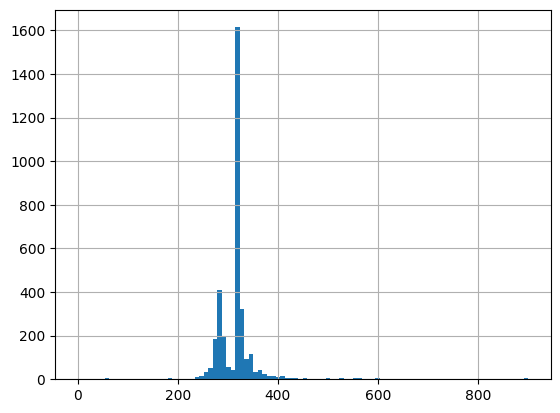

In [18]:
pattern_95[(pattern_95["avg_time"] != 300) & (pattern_95["avg_time"] < 1000)]["avg_time"].hist(bins=100)  